In [2]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import warnings

warnings.filterwarnings('ignore')
np.random.seed(42)

### 数据集读取
- Mnist数据是图像数据：(28,28,1)的灰度图

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", parser='auto')
mnist
# mnist是一个字典，包含了数据集和标签{"data":数据;"target":目标值......},一共有70000张图片，每张图片代表一个数字,有784个特征（每一个数字都占28*28(W * H)个像素）

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

![title](./img/9.png)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
# 洗牌操作
import numpy as np

shuffle_index = np.random.permutation(60000)
# .iloc[]函数是通过行号来取行数据的（如取第一行数据，.iloc[0]）,相当于python中的list[0]表示取第一行数据
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

In [8]:
shuffle_index

array([12628, 37730, 39991, ...,   860, 15795, 56422])

### 交叉验证

![title](./img/5.png)

![title](./img/7.png)

In [11]:
# 取出目标值为5的数据
y_train_5 = (y_train == "5")
print(y_train_5)
y_test_5 = (y_test == "5")

12628    False
37730    False
39991    False
8525     False
8279     False
         ...  
54343    False
38158    False
860      False
15795    False
56422    False
Name: class, Length: 60000, dtype: bool


In [12]:
y_train_5[:10]

12628    False
37730    False
39991    False
8525     False
8279     False
51012    False
14871    False
15127    False
9366      True
33322    False
Name: class, dtype: bool

In [15]:
from sklearn.linear_model import SGDClassifier

# SGDClassifier(stochastic gradient descent)是一个随机梯度下降分类器，适合处理大型数据集
sgd_clf = SGDClassifier(max_iter=5, random_state=42)
# fit()函数用于训练模型,相当于我们字节写的LinearRegression.train()
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=42)

In [16]:
# 随便取出一个数据看看
sgd_clf.predict([X.iloc[35000]])

array([False])

In [18]:
y.iloc[35000]

'1'

In [21]:
from sklearn.model_selection import cross_val_score
# cross_val_score()函数用于交叉验证
# 首先传入一个分类器，然后传入训练集，然后传入目标值，然后传入cv参数,scoring参数用于指定评估指标，这里用的是准确率
# cv=3表示将训练集分成3份，其中2份用于训练，1份用于测试，然后交叉验证3次，每次都会得到一个准确率
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
# 下方输出三次交叉验证后的准确率

array([0.964 , 0.9579, 0.9571])

In [131]:
X_train.shape

(60000, 784)

In [132]:
y_train_5.shape

(60000,)

In [27]:
# 导入StratifiedKFold类，用于分层抽样
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# StratifiedKFold类用于分层抽样，n_splits表示将训练集分成3份，shuffle=True表示打乱数据集，random_state=42表示随机种子
skflods = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
i = 1
for train_index, test_index in skflods.split(X_train, y_train_5):#将三份中每一份都进行以下操作
    print(f'第{i}次测试:')
    i+=1
    # 构造一个具有相同参数的分类器
    clone_clf = clone(sgd_clf)
    # 将 当前训练集 分成两份，一份用于训练，一份用于测试
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]

    X_test_folds = X_train.iloc[test_index]
    y_test_folds = y_train_5.iloc[test_index]
    # 开始用.fit()函数训练模型
    clone_clf.fit(X_train_folds, y_train_folds)
    # 用.predict()函数预测
    y_pred = clone_clf.predict(X_test_folds)
    # 计算正确的个数
    n_correct = sum(y_pred == y_test_folds)
    print(f'正确的个数为:{n_correct}')
    print(f'准确率为:{n_correct / len(y_pred)}')

第1次测试:
正确的个数为:19260
准确率为:0.963
第2次测试:
正确的个数为:18910
准确率为:0.9455
第3次测试:
正确的个数为:19051
准确率为:0.95255


### Confusion Matrix-混淆矩阵

![title](./img/8.png)

In [ ]:
#TP: true_positive(正确判断出目标值的个数),
# FP: false_positive(错误判断出目标值的个数)
# FN: false_negative(错误判断出非目标值的个数)
# TN: true_negative(正确判断出非目标值的个数)

In [29]:
from sklearn.model_selection import cross_val_predict
# 通过cross_val_predict()函数得到每一个数据的预测值
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [30]:
y_train_pred.shape

(60000,)

In [33]:
X_train.shape

(60000, 784)

In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54058,   521],
       [ 1899,  3522]], dtype=int64)

negative class  [[ **true negatives** , **false positives** ],
 
positive class  [ **false negatives** , **true positives** ]]

* true negatives:  54058个数据被正确的分为非5类别
* false positives：521张被错误的分为5类别

* false negatives：1899张错误的分为非5类别
* true positives： 3522张被正确的分为5类别

一个完美的分类器应该只有**true positives** 和 **true negatives**, 即主对角线元素不为0，其余元素为0

### Precision and Recall


### **$ precision = \frac {TP} {TP + FP} $**


### **$ recall = \frac {TP} {TP + FN} $**

![title](./img/1.png)

In [55]:
# 导入precision_score()函数和recall_score()函数
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8711352955725946

In [36]:
recall_score(y_train_5, y_train_pred)

0.6496956281128943

将**Precision** 和 **Recall**结合到一个称为**F1 score** 的指标,调和平均值给予低值更多权重。 因此，如果召回和精确度都很高，分类器将获得高F 1分数。

### $ F_1  = $ $2\over {1\over precision}+{1\over recall} $ $=$ $2×$ $precision×recall\over precision+recall $ $=$ $TP\over {TP}+{FN + FP\over 2}$

In [37]:
from sklearn.metrics import f1_score
# f1_score()函数用于计算F1 score,它代表了整一个模型的评估值
f1_score(y_train_5, y_train_pred)

0.7442941673710904

### 阈值对结果的影响

![title](./img/2.png)

In [57]:
# 使用.decision_function(你想要测试的一个样本),返回的是该样本的分数
y_scores = sgd_clf.decision_function([X.iloc[35000]])
y_scores

array([-232764.96231592])

In [39]:
t = 50000
y_pred = (y_scores > t)
y_pred

array([False])

Scikit-Learn不允许直接设置阈值，但它可以得到决策分数，调用其**decision_function（）**方法，而不是调用分类器的**predict（）**方法，该方法返回每个实例的分数，然后使用想要的**阈值**根据这些分数进行预测：

In [40]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [41]:
y_scores[:10]

array([ -545086.1906455 ,  -200238.20632717,  -366873.76172794,
        -648828.94558457,  -572767.52239341, -1016184.25580999,
        -419438.40135301,  -171080.39957192,   237230.03978349,
        -793932.50331372])

In [42]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [43]:
y_train_5.shape

(60000,)

In [44]:
thresholds.shape

(60000,)

In [45]:
precisions[:10]

array([0.09035   , 0.09035151, 0.09035301, 0.09035452, 0.09035602,
       0.09035753, 0.09035904, 0.09036054, 0.09036205, 0.09036355])

In [46]:
precisions.shape

(60001,)

In [47]:
recalls.shape

(60001,)

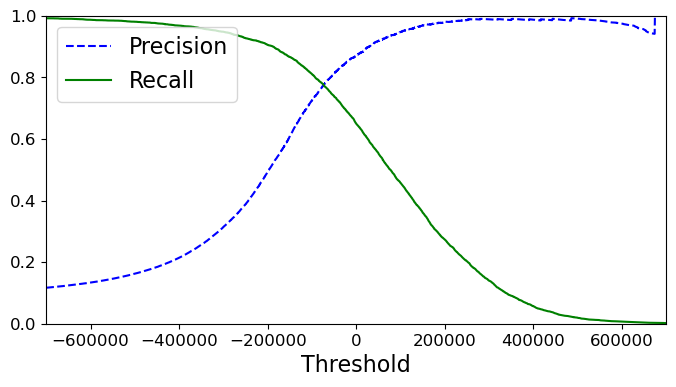

In [48]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds,
             precisions[:-1],
             "b--",
             label="Precision")

    plt.plot(thresholds,
             recalls[:-1],
             "g-",
             label="Recall")
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])


plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

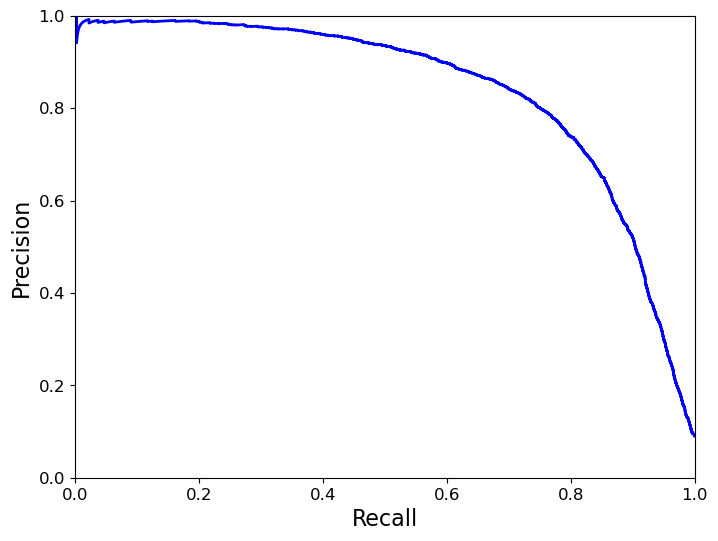

In [49]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls,
             precisions,
             "b-",
             linewidth=2)

    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])


plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### ROC curves
**receiver operating characteristic (ROC)** 曲线是二元分类中的常用评估方法
* 它与精确度/召回曲线非常相似，但ROC曲线不是绘制精确度与召回率，而是绘制**true positive rate(TPR)** 与**false positive rate(FPR)** 

* 要绘制ROC曲线，首先需要使用**roc_curve（）**函数计算各种阈值的**TPR和FPR**：

TPR = TP / (TP + FN) (Recall)

FPR = FP / (FP + TN)

In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

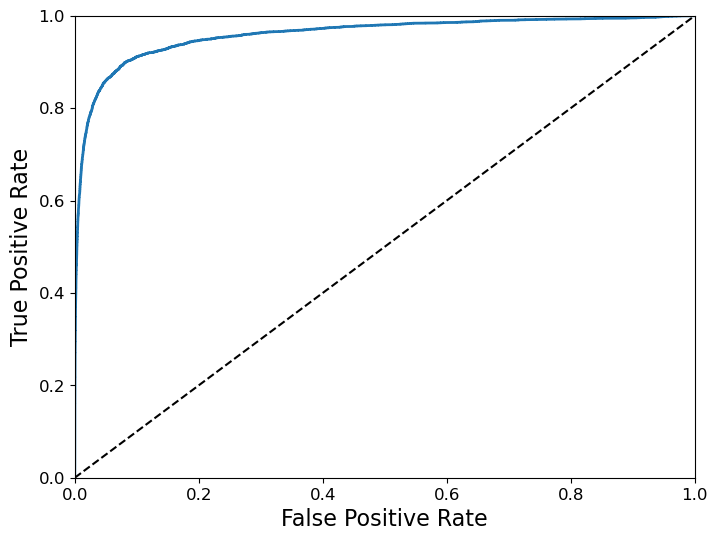

In [51]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

**虚线表示纯随机分类器的ROC曲线**; 一个好的分类器尽可能远离该线（朝左上角）。

比较分类器的一种方法是测量曲线下面积（AUC）。完美分类器的ROC AUC**等于1**，而纯随机分类器的ROC AUC**等于0.5**。 Scikit-Learn提供了计算ROC AUC的函数：

In [52]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9598058535696421